<a href="https://colab.research.google.com/github/FranciscoPaixao/PredicaoDiabetesML/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dados = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/IA/diabetes.csv')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
 dados.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Substitui os valores faltantes

dados['Glucose'] = dados['Glucose'].replace(0, dados['Glucose'].mode()[0])

dados['BloodPressure'] = dados['BloodPressure'].replace(0, dados['BloodPressure'].median())

dados['SkinThickness'] = dados['SkinThickness'].replace(0, dados['SkinThickness'].median())

dados['Insulin'] = dados['Insulin'] .replace(0, dados['Insulin'].median())

dados['BMI'] = dados['BMI'].replace(0, dados['BMI'].median())

In [ ]:
dados.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.539062,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.490660,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

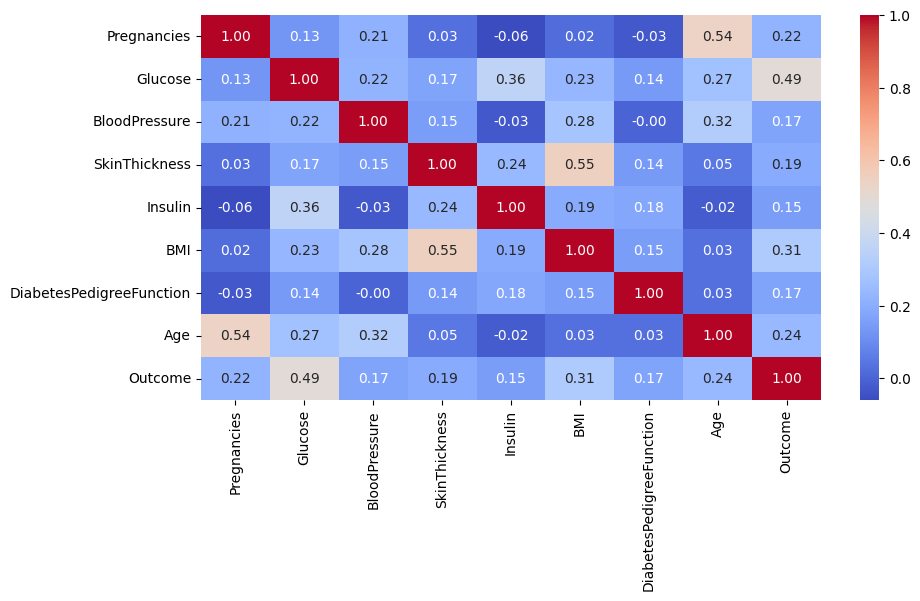

In [ ]:
correlacao = dados.corr(numeric_only=True).round(2)
plt.figure(figsize=(10,5))
sns.heatmap(correlacao,annot=True, fmt = ".2f", cmap = "coolwarm")

In [ ]:
X = dados.drop(["Outcome"] ,axis="columns")
y = dados['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1337, shuffle=True)

Relatório MLP:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       179
           1       0.56      0.52      0.54        75

    accuracy                           0.74       254
   macro avg       0.68      0.67      0.68       254
weighted avg       0.73      0.74      0.73       254



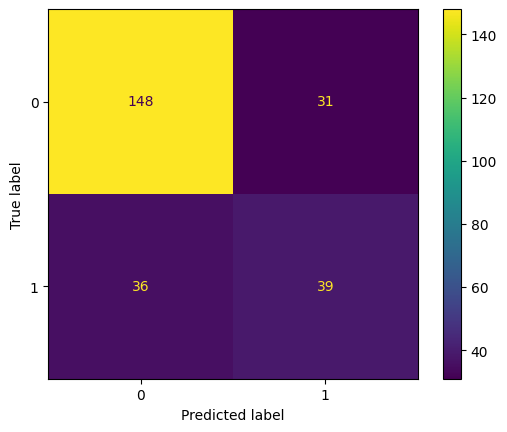

In [ ]:
modelo = MLPClassifier(max_iter=20000, activation='logistic',verbose=False)

modelo.fit(X_train, y_train)

print("Relatório MLP:")

y_predMLP = modelo.predict(X_test)

relatorio = classification_report(y_test, y_predMLP)
print(relatorio)

matrizMLP = confusion_matrix(y_test, y_predMLP)
dispMLP = ConfusionMatrixDisplay(confusion_matrix=matrizMLP)
dispMLP.plot()



Relatório SVM: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       179
           1       0.64      0.56      0.60        75

    accuracy                           0.78       254
   macro avg       0.73      0.71      0.72       254
weighted avg       0.77      0.78      0.77       254



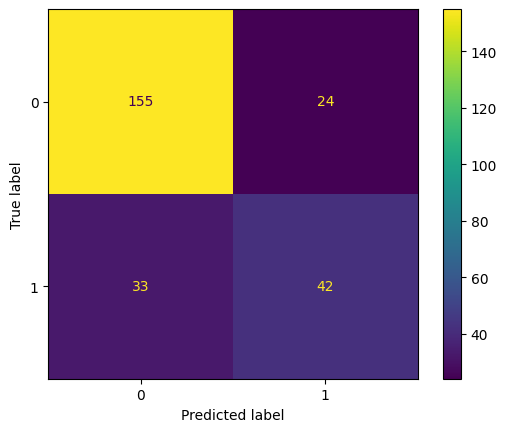

In [ ]:
modeloSVM = svm.SVC(kernel='linear')
modeloSVM.fit(X_train, y_train)

y_predSVM = modeloSVM.predict(X_test)

relatorioSVM = classification_report(y_test, y_predSVM)

print("Relatório SVM: \n", relatorioSVM)

matrizSVM = confusion_matrix(y_test, y_predSVM)
dispSVM = ConfusionMatrixDisplay(confusion_matrix=matrizSVM)
dispSVM.plot()


Relatório LR: 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       179
           1       0.61      0.55      0.58        75

    accuracy                           0.76       254
   macro avg       0.72      0.70      0.71       254
weighted avg       0.76      0.76      0.76       254



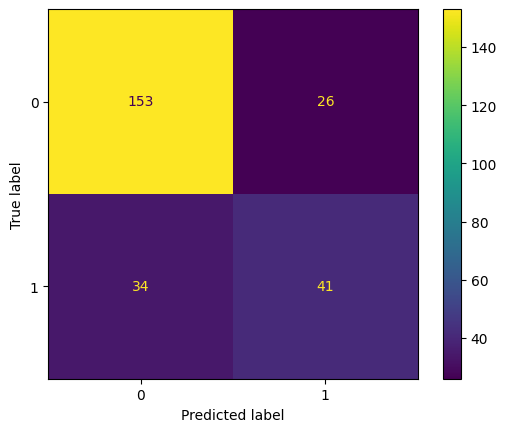

In [ ]:
modeloLR = LogisticRegression(solver='liblinear')

modeloLR.fit(X_train, y_train)

y_predLR = modeloLR.predict(X_test)

relatorioLR = classification_report(y_test, y_predLR)

print("Relatório LR: \n", relatorioLR)

matrizLR = confusion_matrix(y_test, y_predLR)
dispLR = ConfusionMatrixDisplay(confusion_matrix=matrizLR)
dispLR.plot()

# Referências
JOSHI, G. Diabetes Prediction using Machine Learning — Python | by Gopal Joshi | Geek Culture | Medium.  Disponível em: <https://medium.com/geekculture/diabetes-prediction-using-machine-learning-python-23fc98125d8>. Acesso em: 04 dez. 2023.

Diabetes Prediction using Machine Learning. - DEV Community.  Disponível em: <https://dev.to/heyfunmi/diabetes-prediction-using-machine-learning-3kbc>. Acesso em: 04 dez. 2023.

Project 2: Diabetes Prediction using Machine Learning with Python | End To End Python ML Project - YouTube.  Disponível em: <https://www.youtube.com/watch?v=xUE7SjVx9bQ>. Acesso em: 04 dez. 2023.

RNACancerMama.ipynb - Colaboratory.  Disponível em: <https://colab.research.google.com/drive/1GLMAzqh9yqg2Ohm_z7lnwqi939cBOwQS?usp=sharing#scrollTo=2oRfZNSq0U4C>. Acesso em: 04 dez. 2023.